# <p style="text-align: center;">Bike sharing demand prediction</p>

# Introduction

### Background:
Bike sharing has become an essential component of sustainable urban mobility, complementing public transport and reducing car dependence. Understanding demand patterns is crucial for rebalancing bicycles across stations, planning capacity, and forecasting peak usage.

### Task relevance:
- Demand is typically measured as the number of bikes rented per hour/day, which is a continuous variable suited for regression.
- Predictive models can help operators deploy resources more effectively, minimize shortages, and improve the user experience.

### Dataset :
This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

### Basic Information

- **instant:** Indicates the record index (row identifier).
- **dteday:** Indicates the calendar date of the observation.
- **season:** Indicates the season (1: winter, 2: spring, 3: summer, 4: fall).
- **yr:** Indicates the year (0: 2011, 1: 2012).
- **mnth:** Indicates the month of the year (1–12).
- **hr:** Indicates the hour of the day (0–23; available only in the hourly dataset, not in day.csv).
- **holiday:** Indicates whether the day is a holiday (derived from the DC holiday schedule).
- **weekday:** Indicates the day of the week.
- **workingday:** Indicates whether the day is a working day (1) or weekend/holiday (0).
- **weathersit:** Indicates the weather situation category (1: clear/few clouds/partly cloudy; 2: mist + clouds; 3: light snow or light rain with clouds/thunder; 4: heavy rain/ice pellets/thunder/mist or snow + fog).
- **temp:** Normalized temperature in Celsius; derived as (t − t_min)/(t_max − t_min), with t_min = −8, t_max = 39 (hourly scale).
- **atemp:** Normalized “feels-like” temperature in Celsius; derived as (t − t_min)/(t_max − t_min), with t_min = −16, t_max = 50 (hourly scale).
- **hum:** Normalized humidity; values divided by 100 (max).
- **windspeed:** Normalized wind speed; values divided by 67 (max).

### Operation Information

- **casual:** Count of rentals by casual (non-registered) users.
- **registered:** Count of rentals by registered users.
- **cnt:** Total count of rental bikes (casual + registered).

# Imports and Setup

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Data Loading 

In [118]:
df_bike_original = pd.read_csv('Exercise2BikeSharing.csv')

In [119]:
df_bike_original.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [120]:
df_bike_original.info() 
df_bike_original.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Note : 'dteday' does not add any information considering there already is 'yr', 'mnth', 'weekday' and 'workingday'

In [121]:
df_bike = df_bike_original[df_bike_original['dteday'] < '2012-07-01']
df_bike_oot = df_bike_original[df_bike_original['dteday'] >= '2012-07-01']

## Normalization

Normalization is in fact not needed for XGBoost

## Train/Test split

In [122]:
x_bike = df_bike.drop(columns=['cnt'] + to_remove)
y_bike = df_bike['cnt']

In [123]:
X_bike_train, X_bike_test, y_bike_train, y_bike_test = train_test_split(x_bike, y_bike, test_size=0.2, random_state=42)

## Training of the model

### Grid Search

In [124]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_bike_train, y_bike_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/panda

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best Score: 18.080210229605793


In [125]:
xgb_model = XGBRegressor(objective='reg:squarederror',colsample_bytree=1.0, n_estimators=100, learning_rate=0.1, max_depth=3, subsample=1.0, random_state=42)
xgb_model.fit(X_bike_train, y_bike_train)
y_bike_pred = xgb_model.predict(X_bike_test)

In [126]:
y_bike_pred = pd.Series(y_bike_pred, index=y_bike_test.index)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

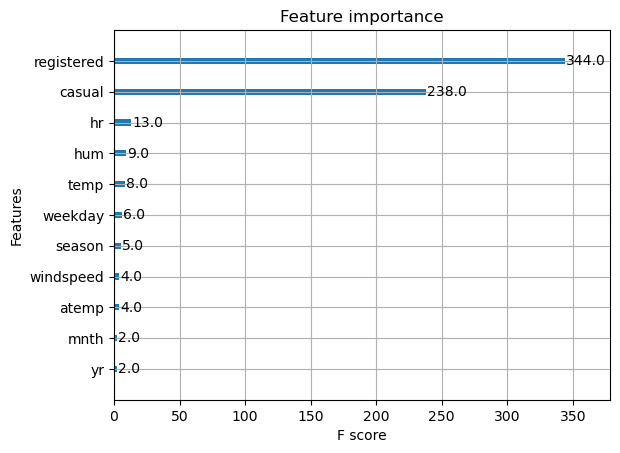

In [127]:
xgb.plot_importance(xgb_model)

## Metrics

In [128]:
# Calculate metrics
mse = mean_squared_error(y_bike_test, y_bike_pred)
rmse = mean_squared_error(y_bike_test, y_bike_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_bike_test, y_bike_pred)
r2 = r2_score(y_bike_test, y_bike_pred)

# Print metrics
print("Metrics on Test Set:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Metrics on Test Set:
Mean Squared Error (MSE): 31.57756713969123
Root Mean Squared Error (RMSE): 5.619392061396965
Mean Absolute Error (MAE): 3.261522469269409
R-squared (R2): 0.9987642195591244


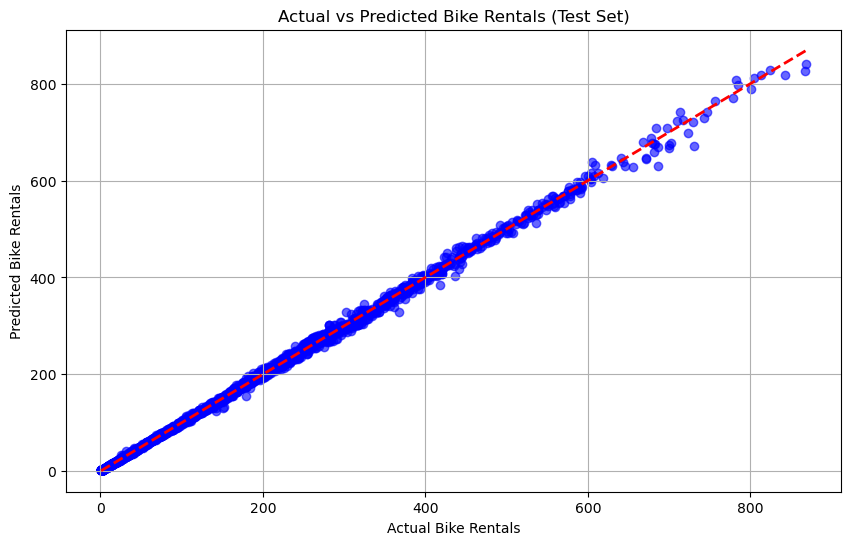

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(y_bike_test, y_bike_pred, alpha=0.6, color='b')
plt.plot([y_bike_test.min(), y_bike_test.max()], [y_bike_test.min(), y_bike_test.max()], 'r--', lw=2)
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title('Actual vs Predicted Bike Rentals (Test Set)')
plt.grid(True)
plt.show()

## Out Of Time Validation

In [131]:
y_bike_oot = df_bike_oot['cnt']
x_bike_oot = df_bike_oot.drop(columns=['cnt'] + to_remove)
y_bike_oot_pred = xgb_model.predict(x_bike_oot)
y_bike_oot_pred = pd.Series(y_bike_oot_pred, index=y_bike_oot.index)

## Metrics

In [132]:
# Calculate metrics
mse = mean_squared_error(y_bike_oot, y_bike_oot_pred)
rmse = mean_squared_error(y_bike_oot, y_bike_oot_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_bike_oot, y_bike_oot_pred)
r2 = r2_score(y_bike_oot, y_bike_oot_pred)

# Print metrics
print("Metrics on Out-of-Time Set:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Metrics on Out-of-Time Set:
Mean Squared Error (MSE): 154.56302080892718
Root Mean Squared Error (RMSE): 12.432337704910013
Mean Absolute Error (MAE): 6.071037326532482
R-squared (R2): 0.9967975894912273


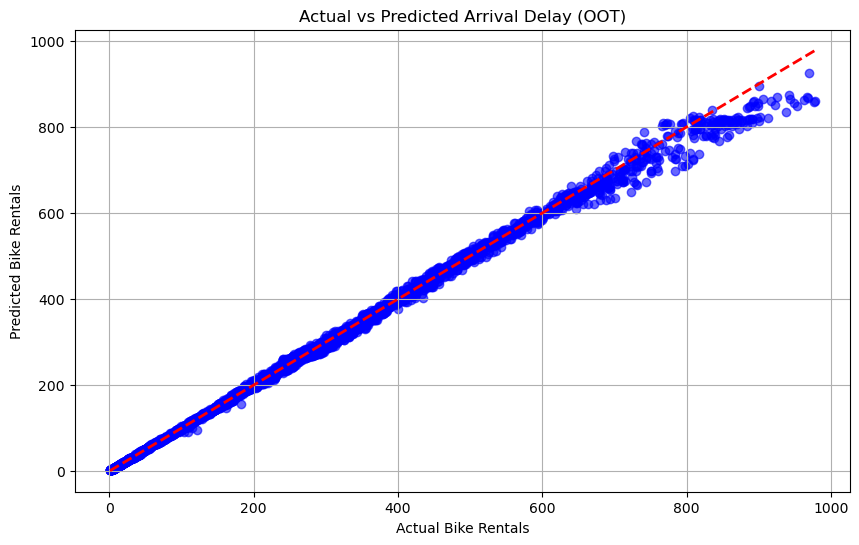

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(y_bike_oot, y_bike_oot_pred, alpha=0.6, color='b')
plt.plot([y_bike_oot.min(), y_bike_oot.max()], [y_bike_oot.min(), y_bike_oot.max()], 'r--', lw=2)
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title('Actual vs Predicted Arrival Delay (OOT)')
plt.grid(True)
plt.show()


## Predictions over time

For better visualisation purposes, I've chosen to display only one month being October (my birthmonth, what a coincidence).

/var/folders/mz/knkr04_j0kgg6f2wtc1gymsc0000gn/T/ipykernel_16457/3424278235.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike_oot['actual'] = df_bike_oot['cnt']
/var/folders/mz/knkr04_j0kgg6f2wtc1gymsc0000gn/T/ipykernel_16457/3424278235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike_oot['predicted'] = xgb_model.predict(X_bike_oot)
/var/folders/mz/knkr04_j0kgg6f2wtc1gymsc0000gn/T/ipykernel_16457/3424278235.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

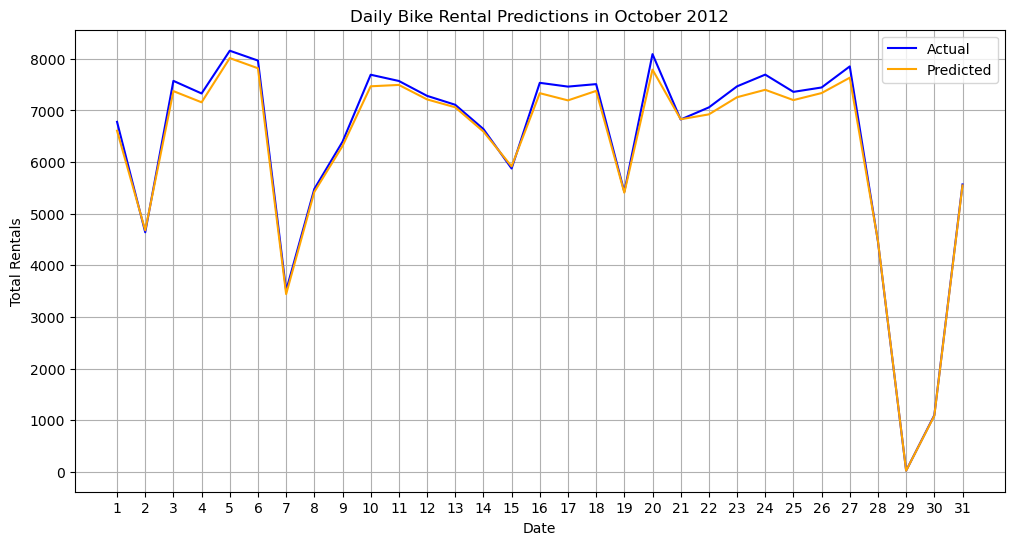

In [135]:
# Convert the index to datetime if necessary (assuming 'dteday' column exists in the original dataset)
#df_bike['dteday'] = pd.to_datetime(df_bike['dteday'])

# Add predictions to the test dataset
X_bike_oot = df_bike_oot.drop(columns=['cnt'] + to_remove)
df_bike_oot['actual'] = df_bike_oot['cnt']
df_bike_oot['predicted'] = xgb_model.predict(X_bike_oot)

df_bike_oot_birthmonth = df_bike_oot[df_bike_oot['dteday'].between('2012-10-01', '2012-10-31')]
df_bike_oot_birthmonth['day'] = pd.to_datetime(df_bike_oot_birthmonth['dteday']).dt.day
# Group by date and calculate daily sums
daily_predictions = df_bike_oot_birthmonth.groupby(df_bike_oot_birthmonth['day']).agg({'actual': 'sum', 'predicted': 'sum'})

# Plot daily predictions
plt.figure(figsize=(12, 6))
plt.plot(daily_predictions.index, daily_predictions['actual'], label='Actual', color='blue')
plt.plot(daily_predictions.index, daily_predictions['predicted'], label='Predicted', color='orange')
plt.xticks(daily_predictions.index)
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.title('Daily Bike Rental Predictions in October 2012')
plt.legend()
plt.grid(True)
plt.show()